In [106]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [107]:
files = 'C:/Users/prans\Desktop/U of T/Classes/Pranav branch/cleaned_files/mortgage.csv'
df=pd.read_csv(files)
df

,Mortgage_Rate,date
0,5.59,2005-02
1,5.60,2005-03
2,5.67,2005-04
3,5.55,2005-05
4,5.31,2005-06
...,...,...
198,3.20,2021-08
199,3.22,2021-09
200,3.29,2021-10
201,3.40,2021-11


In [108]:
df.isnull().sum()

Mortgage_Rate    0
date             0
dtype: int64

In [109]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df

,Mortgage_Rate
date,
2005-02-01,5.59
2005-03-01,5.60
2005-04-01,5.67
2005-05-01,5.55
2005-06-01,5.31
...,...
2021-08-01,3.20
2021-09-01,3.22
2021-10-01,3.29


<AxesSubplot:xlabel='date'>

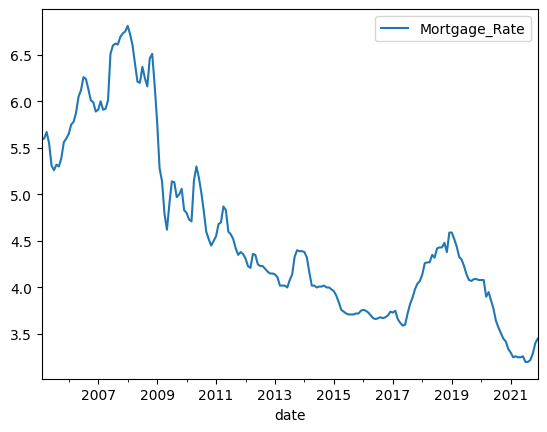

In [110]:
df.plot()

In [111]:
from statsmodels.tsa.stattools import adfuller

In [112]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [113]:
adf_test(df['Mortgage_Rate'])

ADF Statistics: -1.2050626433424014
p- value: 0.6714141076610617
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [114]:
## Use Techniques Differencing
df['Mortgage_Rate first Difference']=df['Mortgage_Rate']-df['Mortgage_Rate'].shift(1)
df.head()


,Mortgage_Rate,Mortgage_Rate first Difference
date,,
2005-02-01,5.59,NaN
2005-03-01,5.60,0.01
2005-04-01,5.67,0.07
2005-05-01,5.55,-0.12
2005-06-01,5.31,-0.24


In [115]:
adf_test(df['Mortgage_Rate first Difference'].dropna())

ADF Statistics: -6.9039913315207215
p- value: 1.260906174033219e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [116]:
### 12 months 
## Use Techniques Differencing
df['Mortgage_Rate 12 difference']=df['Mortgage_Rate']-df['Mortgage_Rate'].shift(12)

In [117]:
adf_test(df['Mortgage_Rate 12 difference'].dropna())

ADF Statistics: -2.6392368282699774
p- value: 0.08515589166500442
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [118]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

c:\Users\prans\anaconda3\envs\mlenv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


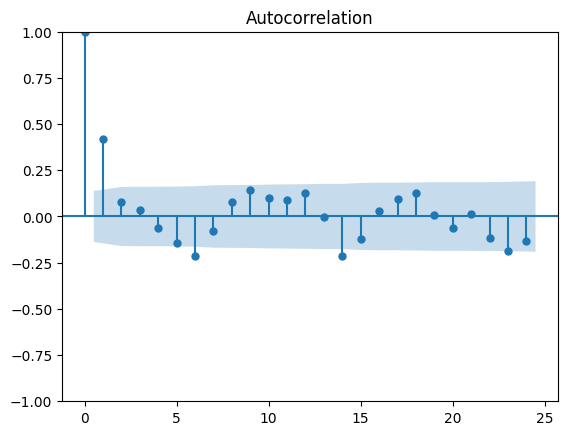

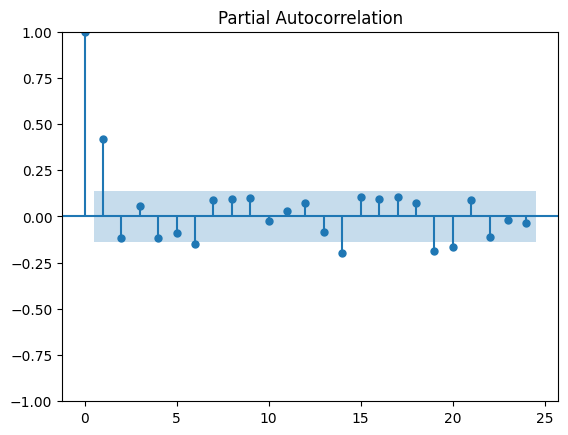

In [119]:
acf = plot_acf(df["Mortgage_Rate first Difference"].dropna())
pacf = plot_pacf(df["Mortgage_Rate first Difference"].dropna())

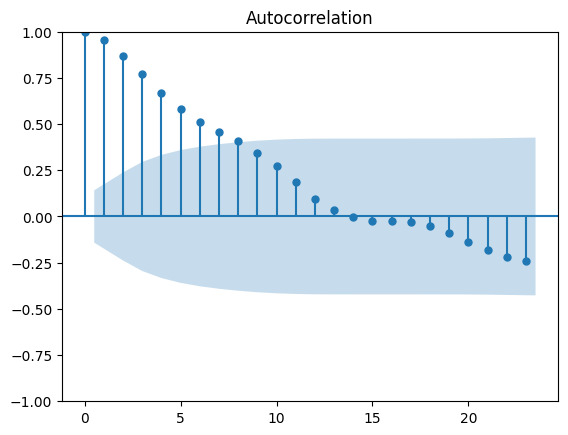

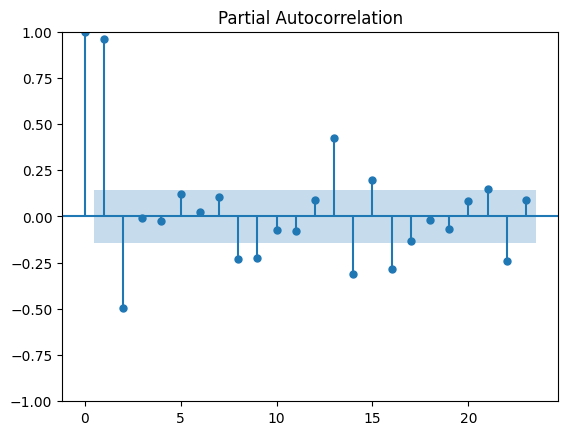

In [120]:
acf12 = plot_acf(df["Mortgage_Rate 12 difference"].dropna())
pacf12 = plot_pacf(df["Mortgage_Rate 12 difference"].dropna())

In [121]:
df

,Mortgage_Rate,Mortgage_Rate first Difference,Mortgage_Rate 12 difference
date,,,
2005-02-01,5.59,NaN,NaN
2005-03-01,5.60,0.01,NaN
2005-04-01,5.67,0.07,NaN
2005-05-01,5.55,-0.12,NaN
2005-06-01,5.31,-0.24,NaN
...,...,...,...
2021-08-01,3.20,0.00,-0.37
2021-09-01,3.22,0.02,-0.29
2021-10-01,3.29,0.07,-0.16


In [122]:
train= df.iloc[:len(df)-60]
test = df.iloc[len(df)-60:]


In [123]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [124]:
train

,Mortgage_Rate,Mortgage_Rate first Difference,Mortgage_Rate 12 difference
date,,,
2005-02-01,5.59,NaN,NaN
2005-03-01,5.60,0.01,NaN
2005-04-01,5.67,0.07,NaN
2005-05-01,5.55,-0.12,NaN
2005-06-01,5.31,-0.24,NaN
...,...,...,...
2016-08-01,3.68,0.01,-0.03
2016-09-01,3.67,-0.01,-0.04
2016-10-01,3.68,0.01,-0.04


In [127]:
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA=ARIMA(train['Mortgage_Rate'],order=(6,1,0))


c:\Users\prans\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\prans\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\prans\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [128]:
model_Arima_fit=model_ARIMA.fit()

In [129]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Mortgage_Rate   No. Observations:                  143
Model:                 ARIMA(6, 1, 0)   Log Likelihood                 111.360
Date:                Tue, 22 Nov 2022   AIC                           -208.719
Time:                        19:06:47   BIC                           -188.029
Sample:                    02-01-2005   HQIC                          -200.311
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5053      0.084      5.985      0.000       0.340       0.671
ar.L2         -0.2416      0.080     -3.031      0.002      -0.398      -0.085
ar.L3          0.1452      0.098      1.474      0.141      -0.048       0.338
ar.L4         -0.1059      0.063     -1.683      0.092      -0.229       0.017
ar.L5         -0.0497      0.112     -0.443      0.658      -0.270       0.170
ar.L6         -0.1340      0.083     -1.605      0.108      -0.298       0.030
sigma2         0.0122      0.001     12.423      0.000       0.010       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               107.71
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""